# Day 24 - LU1
<h2>Demo - Conditional Probaility</h2>

In [1]:
import pandas as pd
df = pd.read_csv("airbnb_data.csv")
df.head(10)

,id,name,room_type,price,minimum_nights,number_of_reviews,city
0,3781,HARBORSIDE-Walk to subway,Apartment,146,28,16,Boston
1,5506,**$49 Special ** Private! Minutes to center!,Apartment,145,3,107,Boston
2,6695,$99 Special!! Home Away! Condo,Apartment,169,3,115,Boston
3,10730,Bright 1bed facing Golden Dome,Apartment,85,91,32,Boston
4,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",Apartment,87,28,10,Boston
5,10986,North End (Waterfront area) CLOSE TO MGH & SU...,Apartment,83,28,2,Boston
6,18711,The Dorset Redline | 3BR 1BA | Walk to Redline...,Apartment,129,32,52,Boston
7,22195,Copley House - Premium Studio,Private,152,1,21,Boston
8,24240,"The Golden Slipper B&B Afloat, 2 bed/2 bath",Apartment,275,2,104,Boston
9,29765,"Luxury suite, Moroccan furnishings",Apartment,226,2,93,Boston


In [11]:
df

,id,name,room_type,price,minimum_nights,number_of_reviews,city
0,3781,HARBORSIDE-Walk to subway,Apartment,146,28,16,Boston
1,5506,**$49 Special ** Private! Minutes to center!,Apartment,145,3,107,Boston
2,6695,$99 Special!! Home Away! Condo,Apartment,169,3,115,Boston
3,10730,Bright 1bed facing Golden Dome,Apartment,85,91,32,Boston
4,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",Apartment,87,28,10,Boston
...,...,...,...,...,...,...,...
32343,43805501,"Modern Boutique Apt in S. Lake Union, Gym +Pet...",Apartment,109,30,0,Seattle
32344,43807087,Beautiful & Bright Downtown Studio,Apartment,119,1,0,Seattle
32345,43807576,3 BDRM/1.75 bath Top Queen Anne home@quiet street,Apartment,299,1,0,Seattle
32346,43807578,Perfect & Bright Downtown Studio,Apartment,119,1,0,Seattle


#### Q. A customer is planning to go to Seattle and wants to know which type of room has the highest chance of being available in Seattle.

Note that the event of _"Finding a room of a specific type given that it is in Seattle"_ is *__Dependent__* on the event of _"Finding a room in Seattle"_.

Let us first calculate the required probability by looking at the data.

In [7]:
#step1
#View the number of rooms of different types in Seattle
#size():This calculates the size(count) of each group the number of occurrences for each unique combination of "city","room_type
df2 = pd.DataFrame({'count' : df.groupby( [ "city", "room_type"] ).size()}).reset_index()
# df2
df2[(df2['city']=='Seattle')]

,city,room_type,count
8,Seattle,Apartment,5028
9,Seattle,HotelRoom,51
10,Seattle,Private,1399
11,Seattle,Shared,97


In [9]:
df2

,city,room_type,count
0,Boston,Apartment,2163
1,Boston,HotelRoom,26
2,Boston,Private,1142
3,Boston,Shared,8
4,Hawaii,Apartment,20050
5,Hawaii,HotelRoom,195
6,Hawaii,Private,2119
7,Hawaii,Shared,70
8,Seattle,Apartment,5028
9,Seattle,HotelRoom,51


In [3]:
df.head()

,id,name,room_type,price,minimum_nights,number_of_reviews,city
0,3781,HARBORSIDE-Walk to subway,Apartment,146,28,16,Boston
1,5506,**$49 Special ** Private! Minutes to center!,Apartment,145,3,107,Boston
2,6695,$99 Special!! Home Away! Condo,Apartment,169,3,115,Boston
3,10730,Bright 1bed facing Golden Dome,Apartment,85,91,32,Boston
4,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",Apartment,87,28,10,Boston


In [8]:
#check different cities - rooms in three cities
df.city.value_counts()

Hawaii     22434
Seattle     6575
Boston      3339
Name: city, dtype: int64

In [4]:
#step2
#calculating the number of rooms in Seattle again
n_sea = df2[(df2['city']=='Seattle')]['count'].sum()
n_sea

6575

In [5]:
#step3 city in seattle roomtype apartment count is 5028 / 6575 
#probability of finding an Apartment given that it is in Seattle
p_aptINsea = round(5028/n_sea,3)
p_aptINsea

0.765

In [6]:
#step4 city in seattle roomtype private count is 1399 / 6575 
#probability of finding a Private room given that it is in Seattle
p_pvtINsea = round(1399/n_sea,3)
p_pvtINsea

0.213

In [7]:
#step 5 city in seattle roomtype hotelroom count is 51 / 6575 
#probability of finding a Hotel room given that it is in Seattle
p_htlINsea = round(51/n_sea,3)
p_htlINsea

0.008

In [8]:
#step 5 city in seattle roomtype shared count is 97 / 6575 
#probability of finding a Shared room given that it is in Seattle
p_shdINsea = round(97/n_sea,3)
p_shdINsea

0.015

### Inference:

1. If the customer tries to book an Apartment in Seattle, then he/she has the maximum chance of getting it compared to other types of rooms.
2. There is teh least chance of getting a Hotel Room in Seattle.

#### Let's calculate the probability of _"Finding an Apartment in Seattle"_ using the formula of Conditional Probability.

**Probability of a dependent event:**
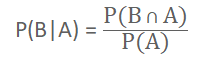


**Probability of intersection of two independent events:**
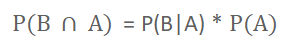

In [9]:
#step1 
#probability of finding a room in Seattle - P(A)

p_sea = 0.203 # From last hands on

In [10]:
#step2 city in seattle roomtype apartment count is 5028 / 6575 = 0.765
#probability that a room is an Apartment given that it is Seattle - P(B|A)
p_aptINsea

0.765

In [11]:
#step3 
#probability of finding an Apartment given that it is in Seattle - P(B AND A)
p_aptINsea * p_sea

0.15529500000000002

### Inference:

1. Probability of finding an Apartment in Seattle calculated using formula for Conditional Probability is 0.155.
2. This probability matches with probability of intersection calculated directly from the data.

#### Q. A host wants to invest in real estate and then use that property for renting though _Airbnb_. The host has decided to buy an Apartment type property but hasn't decided the city yet. Can you help the host find which city has less chance of finding apartments so that the host can decide to buy in that city?

The required probability is _"Finding a room in a specific city given that it is of type Apartment"_. Let's calculate these probabilities for different cities using the formula of __Conditional Probability__.

1) Probability of finding a room in Boston given that it is an Apartment = (Probability of finding an Apartment in Boston)/(Probabiliy of finding an Apartment)

In [12]:
#step1
#probabilitment ity of finding an Aparn Boston 2163 / 32348 = 0.067

#probability of finding an Apartment in Boston
p_aptANDbos = 0.067

In [13]:
#step2
#probability of finding an Apartment 27241/32348 = 0.842

#probability of finding an Apartment
p_apt = 0.842
p_apt

0.842

In [14]:
#step3
#probability of finding an Apartment in Boston = 0.067 
#probability of finding an Apartment = 0.842
#Dependent probability of finding a room in Boston given that it is an Apartment 0.067 / 0.842
p_bos_given_apt = round(p_aptANDbos/p_apt,3)
p_bos_given_apt

0.08

2) Probability of finding a room in Hawaii given that it is an Apartment = (Probability of finding an Apartment in Hawaii)/(Probabiliy of finding an Apartment)

In [9]:
#probability of finding an Apartment in Hawai
ss_ab = 32348 #number of rooms available in each city
n_apt_haw = df[(df['room_type']=='Apartment') & (df['city'] =='Hawaii')].count()['id']
p_aptANDhaw = (n_apt_haw/ss_ab)
p_aptANDhaw

0.619821936441202

In [13]:
n_apt_haw        #20050/32348 = 0.619821936441202

20050

In [11]:
#probability of finding an Apartment 27241/32348 = 0.842

#probability of finding an Apartment
p_apt = 0.842
p_apt

0.842

In [15]:
#step4 
#probability of finding an Apartment in Hawai 0.619
##probability of finding an Apartment 0.842
#DepenNM a room in Hawaii given that it is an Apartment 0.619/ 0.842 = 0.736
p_haw_given_apt = round(p_aptANDhaw/p_apt,3)
p_haw_given_apt

0.736

3) Probability of finding a room in Seattle given that it is an Apartment = (Probability of finding an Apartment in Seattle)/(Probabiliy of finding an Apartment)

In [10]:
#probability of finding an Apartment in Seattle
ss_ab = 32348 #number of rooms available in each city
n_apt_sea = df[(df['room_type']=='Apartment') & (df['city'] =='Seattle')].count()['id']
p_aptANDsea = (n_apt_sea/ss_ab)
p_aptANDsea

0.15543464820081612

In [12]:
#probability of finding an Apartment 27241/32348 = 0.842

#probability of finding an Apartment
p_apt = 0.842
p_apt

0.842

In [16]:
#step5
#probability of finding an Apartment in Seattle 0.155
##probability of finding an Apartment 0.842
#Dependent probability of finding a room in seattle given that it is an Apartment 0.155/ 0.842 = 0.185
p_sea_given_apt = round(p_aptANDsea/p_apt,3)
p_sea_given_apt

0.185

### Inference:

1. Probability of Apartment type rooms is least in Boston. Hence the host should buy an Apartment in Boston to get more profits.